#### 1. R的正交多项式回归

In [1]:
###R语言正交多项式回归
x<-c(37.0, 37.5, 38.0, 38.5, 39.0, 39.5, 40.0, 40.5, 41.0, 41.5, 42.0, 42.5, 43.0)
y<-c(3.40, 3.00, 3.00, 3.27, 2.10, 1.83, 1.53,  1.70, 1.80, 1.90, 2.35, 2.54, 2.90)
lm.pol<-lm(y~1+poly(x,2))
summary(lm.pol)


Call:
lm(formula = y ~ 1 + poly(x, 2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33322 -0.14222 -0.07922  0.05275  0.84577 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.40923    0.09126  26.400  1.4e-10 ***
poly(x, 2)1 -0.94435    0.32904  -2.870 0.016669 *  
poly(x, 2)2  1.74505    0.32904   5.303 0.000346 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.329 on 10 degrees of freedom
Multiple R-squared:  0.7843,	Adjusted R-squared:  0.7412 
F-statistic: 18.18 on 2 and 10 DF,  p-value: 0.0004668


In [12]:
xfit<-seq(37,50,len=5)
yfit<-predict(lm.pol,data.frame(x=xfit))
print(xfit)
print(yfit)

[1] 37.00 40.25 43.50 46.75 50.00
        1         2         3         4         5 
 3.687253  1.837967  3.284266  8.026149 16.063616 


#### 2. 内在非线性回归
R语言做了很多工作，对非线性回归模型做了很大简化

In [3]:
###内在非线性回归
## 输入数据，构成数据框
cl<-data.frame(
   X=c(rep(2*4:21, c(2, 4, 4, 3, 3, 2, 3, 3, 3, 3, 2, 
       3, 2, 1, 2, 2, 1, 1))),
   Y=c(0.49, 0.49, 0.48, 0.47, 0.48, 0.47, 0.46, 0.46, 
       0.45, 0.43, 0.45, 0.43, 0.43, 0.44, 0.43, 0.43, 
       0.46, 0.45, 0.42, 0.42, 0.43, 0.41, 0.41, 0.40, 
       0.42, 0.40, 0.40, 0.41, 0.40, 0.41, 0.41, 0.40, 
       0.40, 0.40, 0.38, 0.41, 0.40, 0.40, 0.41, 0.38, 
       0.40, 0.40, 0.39, 0.39)
)

## 作非线性拟合，并输出各参数的估计值
nls.sol<-nls(Y~a+(0.49-a)*exp(-b*(X-8)), data=cl,
             start = list( a= 0.1, b = 0.01 ))
summary(nls.sol)


Formula: Y ~ a + (0.49 - a) * exp(-b * (X - 8))

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a 0.390140   0.005045  77.333  < 2e-16 ***
b 0.101633   0.013360   7.607 1.99e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01091 on 42 degrees of freedom

Number of iterations to convergence: 19 
Achieved convergence tolerance: 1.365e-06


ERROR: Error in fn(nls.sum$parameters[1, 1], nls.sum$parameters[2, 1], cl$X): object 'nls.sum' not found


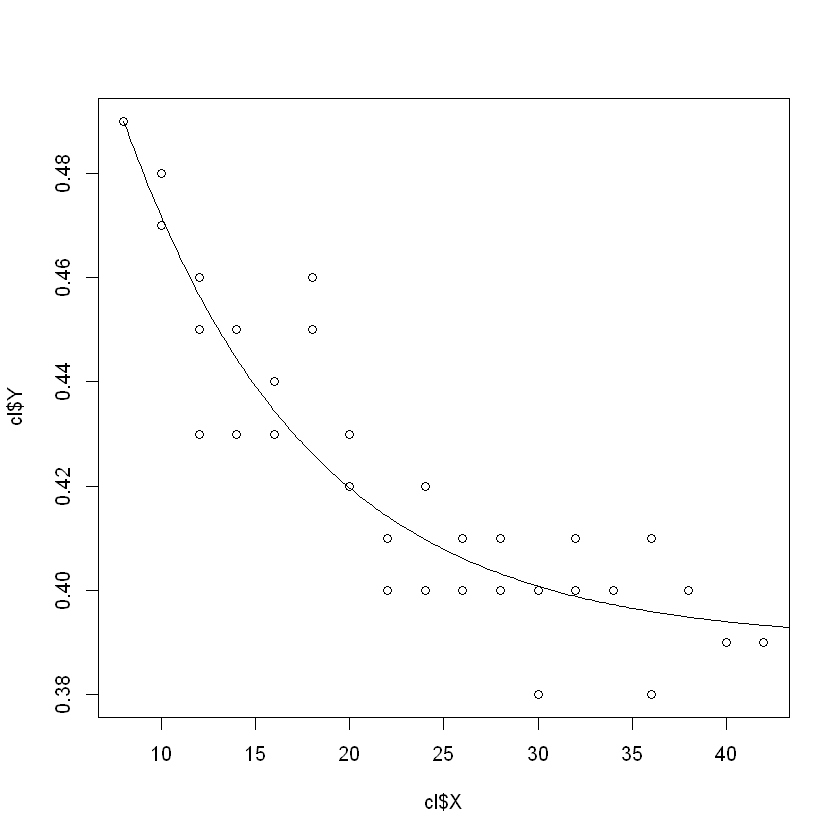

In [4]:
## 画出拟合曲线和散点图
xfit<-seq(8,44,len=200)
yfit<-predict(nls.sol, data.frame(X=xfit))
plot(cl$X, cl$Y)
lines(xfit,yfit)

## 计算偏导数和相应的Jacobi矩阵
fn<-function(a, b, X){
   f1 <- 1-exp(-b*(X-8))
   f2 <- -(0.49-a)*(X-8)*exp(-b*(X-8))
   cbind(f1,f2)
}
D<-fn(nls.sum$parameters[1,1], nls.sum$parameters[2,1], cl$X)

## 作theta的方差估计
theta.var<-nls.sum$sigma^2*solve(t(D)%*%D); theta.var

#### 3.回归样条

In [1]:
library(ISLR)
#data("Wage")
attach(Wage)


Call:
lm(formula = wage ~ splines::bs(age, knots = c(25, 40, 60)), 
    data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.832 -24.537  -5.049  15.209 203.207 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                                60.494      9.460   6.394 1.86e-10
splines::bs(age, knots = c(25, 40, 60))1    3.980     12.538   0.317 0.750899
splines::bs(age, knots = c(25, 40, 60))2   44.631      9.626   4.636 3.70e-06
splines::bs(age, knots = c(25, 40, 60))3   62.839     10.755   5.843 5.69e-09
splines::bs(age, knots = c(25, 40, 60))4   55.991     10.706   5.230 1.81e-07
splines::bs(age, knots = c(25, 40, 60))5   50.688     14.402   3.520 0.000439
splines::bs(age, knots = c(25, 40, 60))6   16.606     19.126   0.868 0.385338
                                            
(Intercept)                              ***
splines::bs(age, knots = c(25, 40, 60))1    
splines::bs(age, knots = c(25, 40, 60))2 ***
s

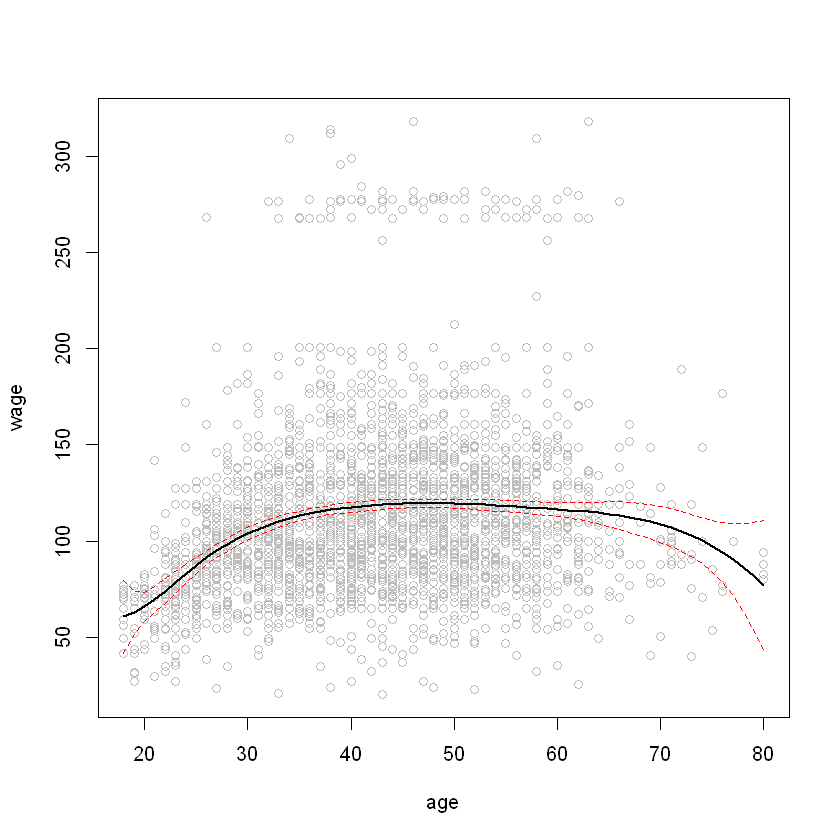

In [6]:
library(splines)
agelims=range(age)
age.grid=seq(from=agelims[1],to=agelims[2])
#fit=lm(wage~bs(age,knots=c(25,40,60)),data=Wage)
fit=lm(wage~splines::bs(age,knots=c(25,40,60)),data=Wage)
summary(fit)
pred=predict(fit,newdata=list(age=age.grid),se=T)
plot(age,wage,col="gray")
lines(age.grid,pred$fit,lwd=2)
lines(age.grid,pred$fit+2*pred$se,col='red',lty="dashed")
lines(age.grid,pred$fit-2*pred$se,col='red',lty="dashed")


Call:
lm(formula = wage ~ splines::ns(age, df = 5), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.651 -24.303  -4.885  15.495 203.837 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 60.475      4.708  12.844  < 2e-16 ***
splines::ns(age, df = 5)1   61.527      4.709  13.065  < 2e-16 ***
splines::ns(age, df = 5)2   55.691      5.717   9.741  < 2e-16 ***
splines::ns(age, df = 5)3   46.818      4.948   9.463  < 2e-16 ***
splines::ns(age, df = 5)4   83.204     11.918   6.982 3.58e-12 ***
splines::ns(age, df = 5)5    6.877      9.484   0.725    0.468    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.91 on 2994 degrees of freedom
Multiple R-squared:  0.08683,	Adjusted R-squared:  0.08531 
F-statistic: 56.94 on 5 and 2994 DF,  p-value: < 2.2e-16


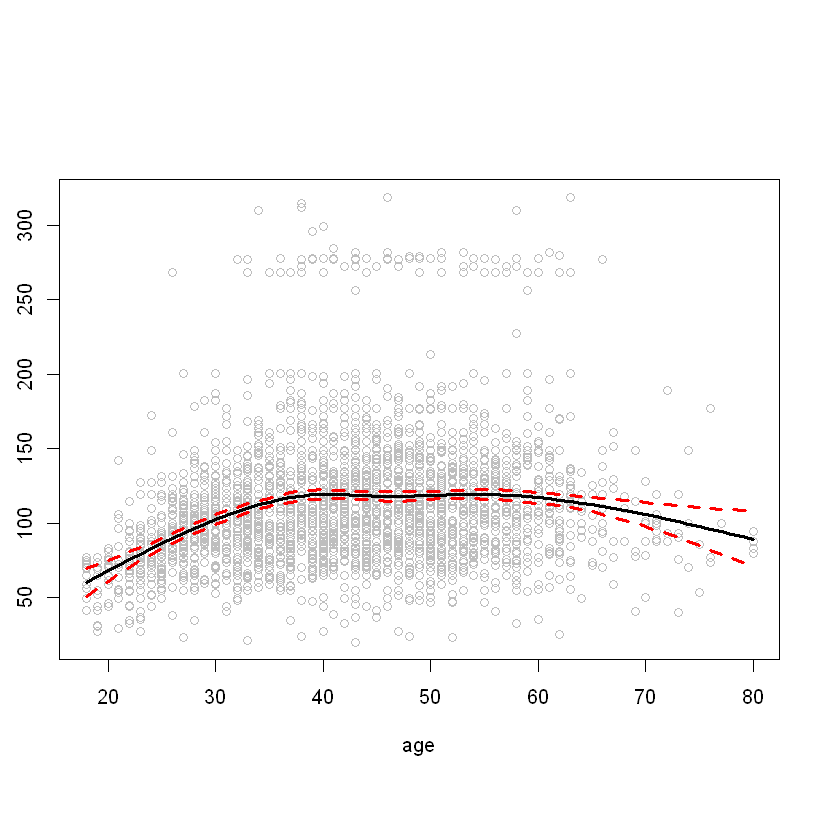

In [33]:
library(splines)
agelims=range(age)
age.grid=seq(from=agelims[1],to=agelims[2])
#fit=lm(wage~splines::ns(age,knots=c(25,40,60)),data=Wage)
fit=lm(wage~splines::ns(age,df=5),data=Wage)
summary(fit)
pred=predict(fit,newdata=list(age=age.grid),se=T)
par(pin = c(6,4))
plot(age,wage,col="gray")
lines(age.grid,pred$fit,lwd=3)
lines(age.grid,pred$fit+2*pred$se,col='red',lty="dashed",lwd=3)
lines(age.grid,pred$fit-2*pred$se,col='red',lty="dashed",lwd=3)

- ##### BSplines回归样条和Statsmodels对比


Call:
lm(formula = wage ~ splines::bs(year, df = 4, degree = 3) + splines::bs(age, 
    df = 5, degree = 3) + education, data = Wage)

Residuals:
     Min       1Q   Median       3Q      Max 
-119.483  -19.826   -3.393   14.145  213.735 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                             48.1113     6.0237   7.987 1.96e-15 ***
splines::bs(year, df = 4, degree = 3)1   0.5586     3.9896   0.140  0.88866    
splines::bs(year, df = 4, degree = 3)2  10.1098     5.0841   1.989  0.04685 *  
splines::bs(year, df = 4, degree = 3)3   3.5835     3.9900   0.898  0.36920    
splines::bs(year, df = 4, degree = 3)4   7.6714     2.3427   3.275  0.00107 ** 
splines::bs(age, df = 5, degree = 3)1    5.6405     9.4754   0.595  0.55170    
splines::bs(age, df = 5, degree = 3)2   44.0021     5.5212   7.970 2.24e-15 ***
splines::bs(age, df = 5, degree = 3)3   35.4848     8.2038   4.325 1.57e-05 ***
splines::bs(age, df = 5, d

Warning message in smooth.spline(age, wage, cv = TRUE):
"cross-validation with non-unique 'x' values seems doubtful"


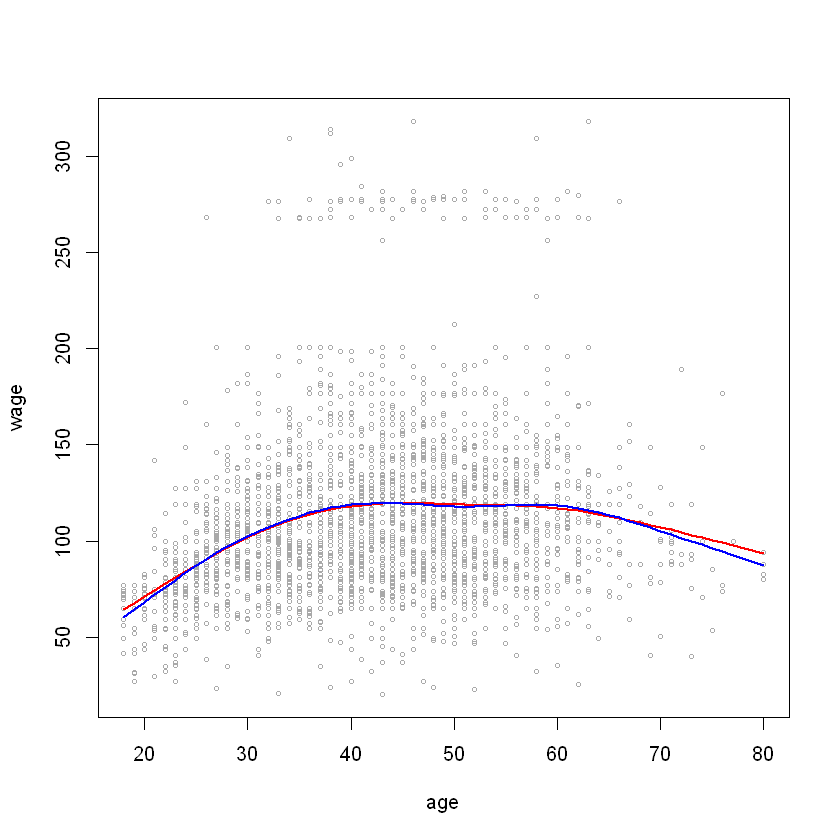

In [8]:
library(splines)
fit.bs=lm(wage~splines::bs(year,df=4,degree=3)+
          splines::bs(age,df=5,degree=3)+education,data=Wage)
summary(fit.bs)
agelims=range(age)
age.grid=seq(from=agelims[1],to=agelims[2])
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")
fit=smooth.spline(age,wage,df=5)
fit2=smooth.spline(age,wage,cv=TRUE)
lines(fit,col="red",lwd=2)
lines(fit2,col="blue",lwd=2)